In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory data analysis

In [3]:
data.shape

(5110, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# fill the null values

In [7]:
data['bmi'] = data['bmi'].fillna(value=data['bmi'].mean())

In [8]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data.drop('id',axis=1,inplace=True)

In [10]:
categorical_data = data.select_dtypes(include='object')
categorical_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [11]:
numerical_data = data.select_dtypes(include=["int64", 'float64'])
numerical_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1


In [12]:
data.replace('Unknown',np.NaN, inplace=True)

In [13]:
data['smoking_status']= data['smoking_status'].fillna(value=data['smoking_status'].mode()[0])

In [14]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [15]:
data.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          3
stroke                  2
dtype: int64

In [16]:
data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [17]:
data[data.gender=="Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [18]:
data = data.drop(index = 3116)

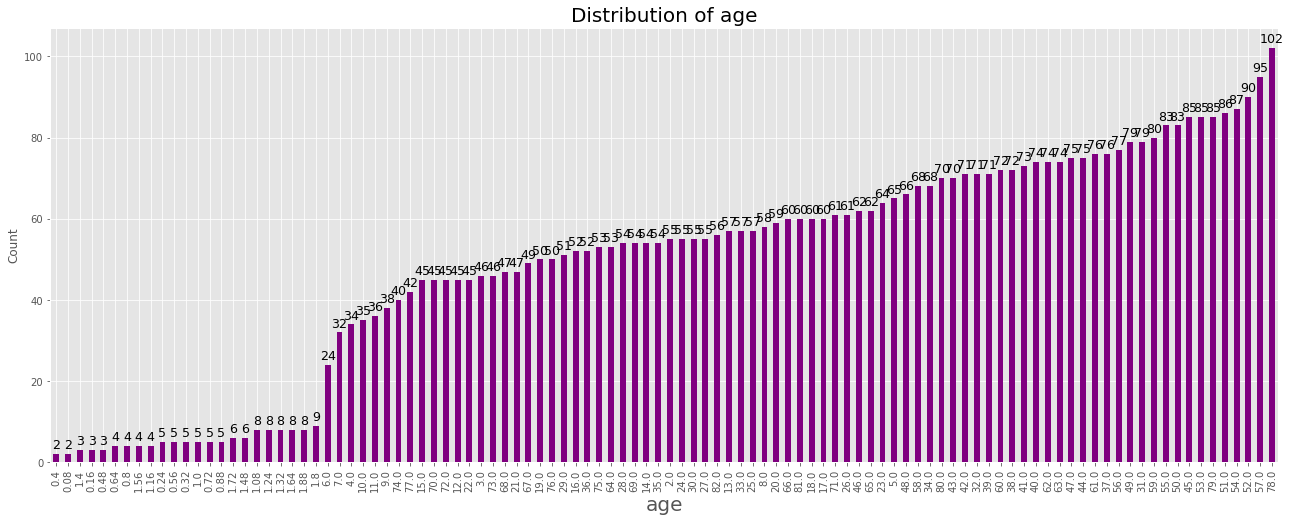

In [19]:
plt.rcParams['figure.figsize'] = (22, 8)
plt.style.use('ggplot')

a = data['age'].value_counts().sort_values().plot(kind = 'bar', color = 'purple')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.title('Distribution of age', fontsize = 20)
plt.xlabel('age', fontsize = 20)
plt.ylabel('Count')
plt.show()

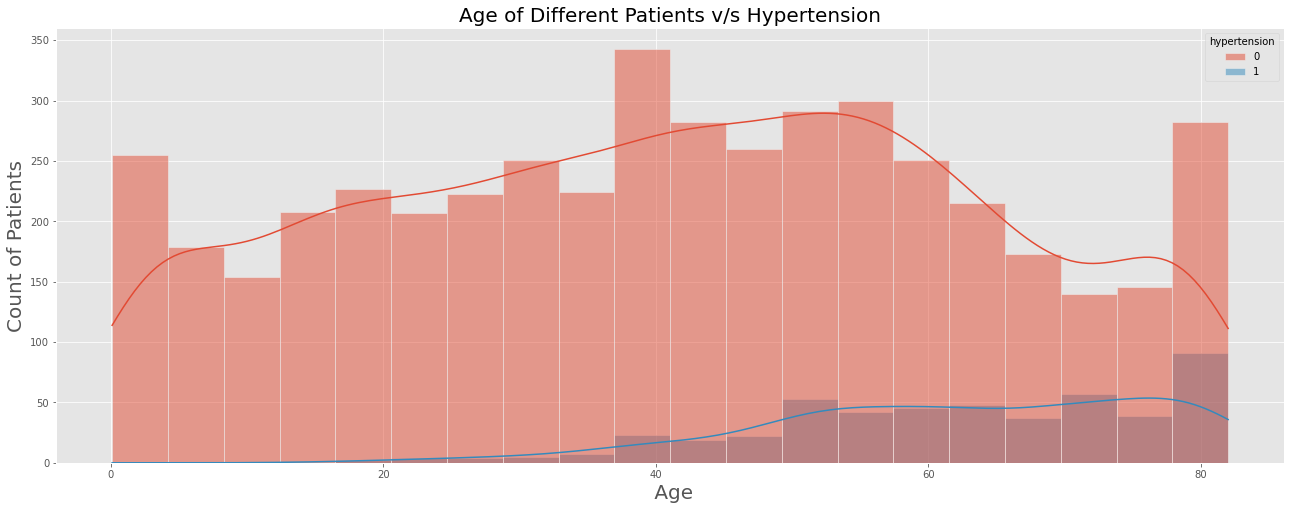

In [20]:
sns.histplot(x=data['age'], hue=data['hypertension'], kde=True)
plt.xlabel(' Age', fontsize=20,)
plt.ylabel('Count of Patients', fontsize=20)
plt.title('Age of Different Patients v/s Hypertension', fontsize=20)
plt.show()

# observation
After age of 35, chances of Hypertension increases.

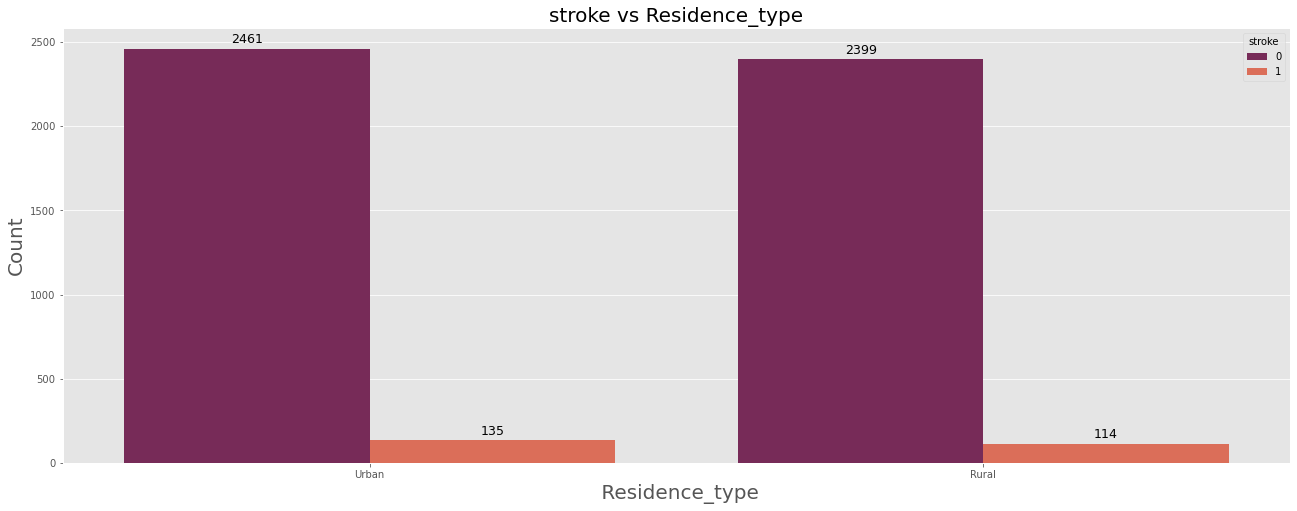

In [21]:
a = sns.countplot(x=data['Residence_type'], hue=data["stroke"], palette='rocket')
plt.xlabel(' Residence_type', fontsize=20,)
plt.ylabel('Count', fontsize=20)
plt.title('stroke vs Residence_type', fontsize=20)
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.show()

# observation
Possibility of stroke is almost same between different residence types

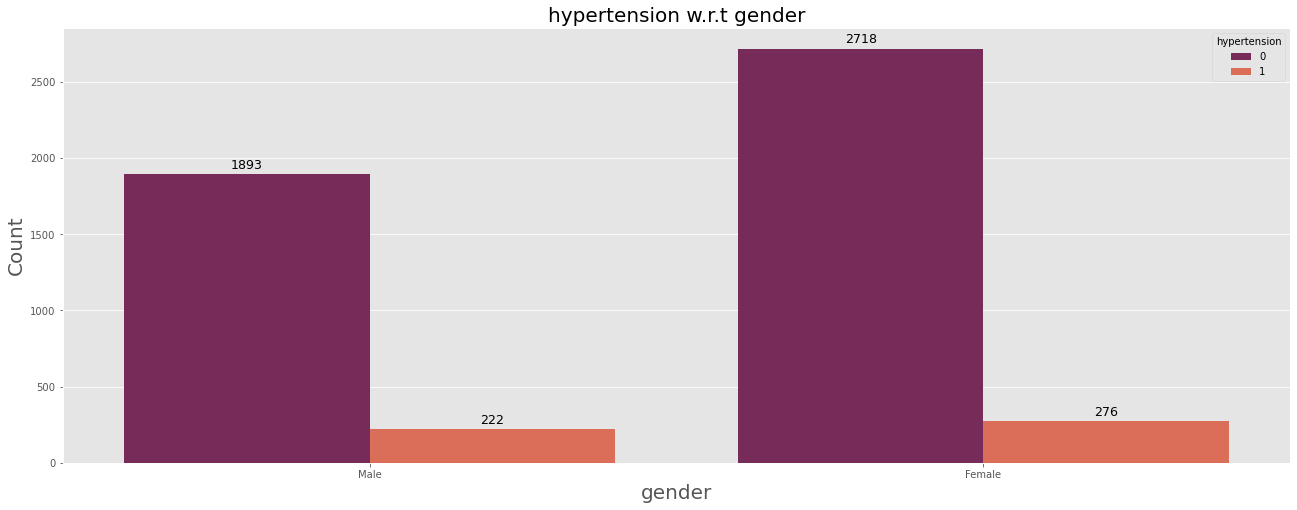

In [22]:
a = sns.countplot(x=data['gender'], hue=data["hypertension"], palette='rocket')
plt.xlabel('gender', fontsize=20,)
plt.ylabel('Count', fontsize=20)
plt.title('hypertension w.r.t gender', fontsize=20)
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.show()

In [23]:
stroke_0 = data[(data['stroke'] == 0)]
stroke_0 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.000000,never smoked,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.200000,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.600000,never smoked,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.900000,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.100000,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [24]:
stroke_1 = data[(data['stroke'] == 1)]
stroke_1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,never smoked,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.900000,never smoked,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.893237,never smoked,1


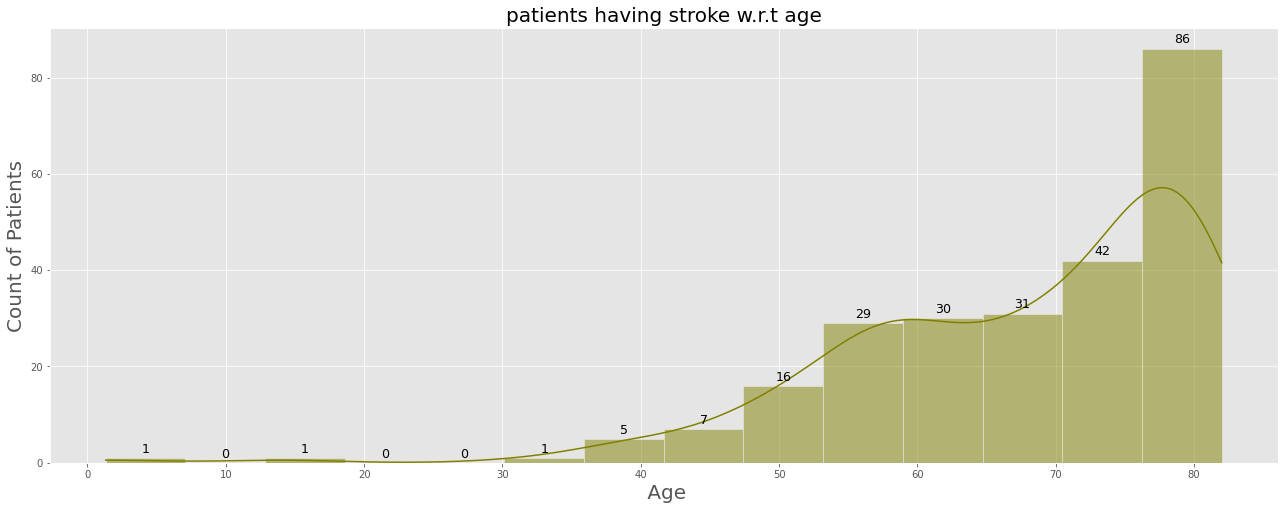

In [25]:
a = sns.histplot(x=stroke_1['age'], kde=True, color="olive")
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.xlabel(' Age', fontsize=20,)
plt.ylabel('Count of Patients', fontsize=20)
plt.title('patients having stroke w.r.t age', fontsize=20)
plt.show()

# observation
After ageof 40, the chances of Stroke increases significantly.

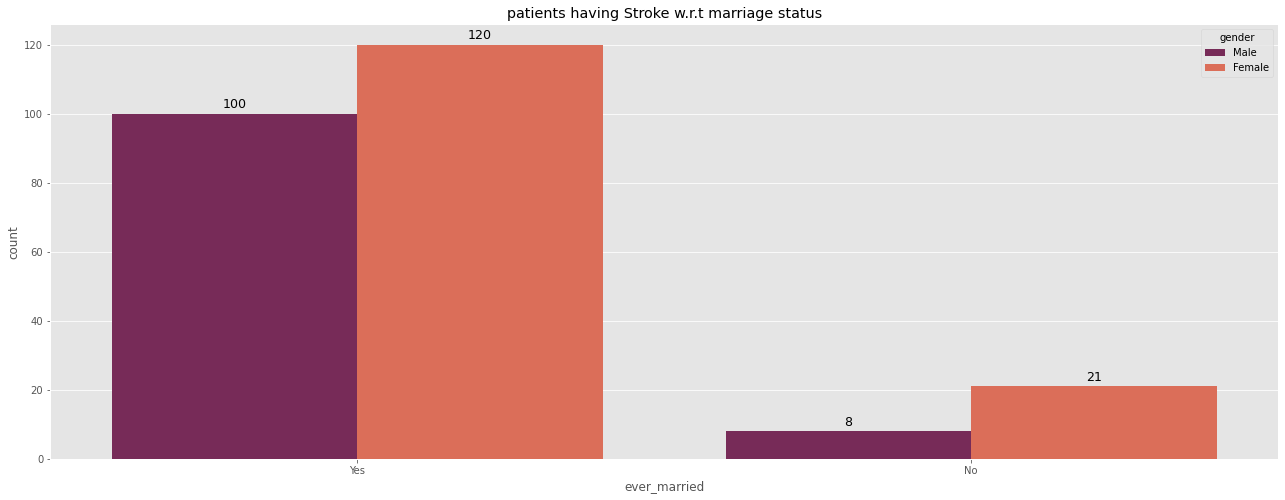

In [26]:
a = sns.countplot(x=stroke_1['ever_married'], hue=stroke_1['gender'],palette='rocket')
plt.title("patients having Stroke w.r.t marriage status")
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.show()

# observation
Female have a higher chance of having stroke be it married or not.

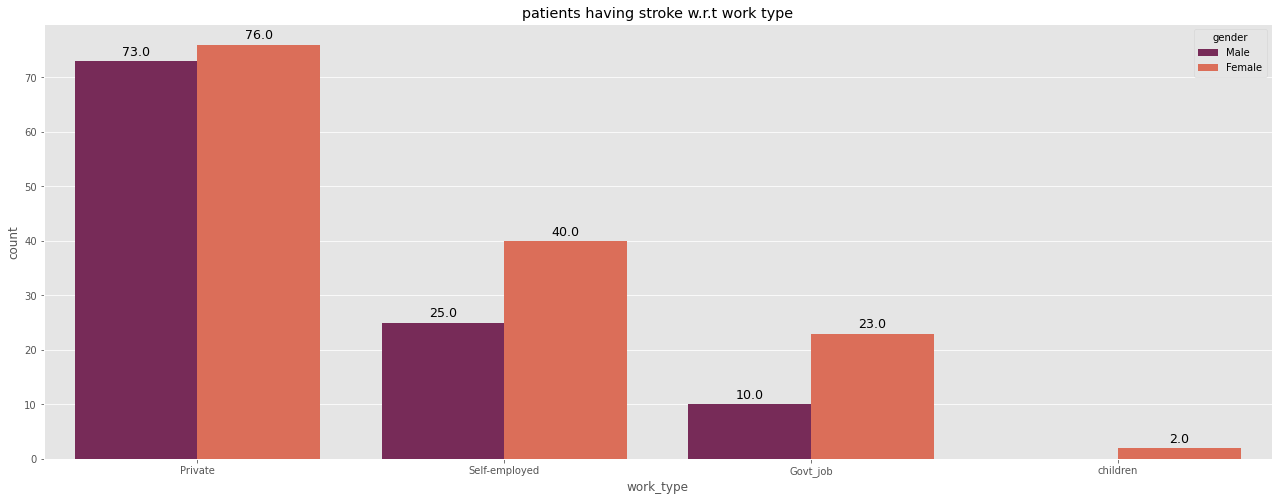

In [27]:
a = sns.countplot(x=stroke_1['work_type'], hue=stroke_1['gender'],palette='rocket')
plt.title("patients having stroke w.r.t work type")
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.show()

# observation
 people who are working in private work type are more likely to have stroke

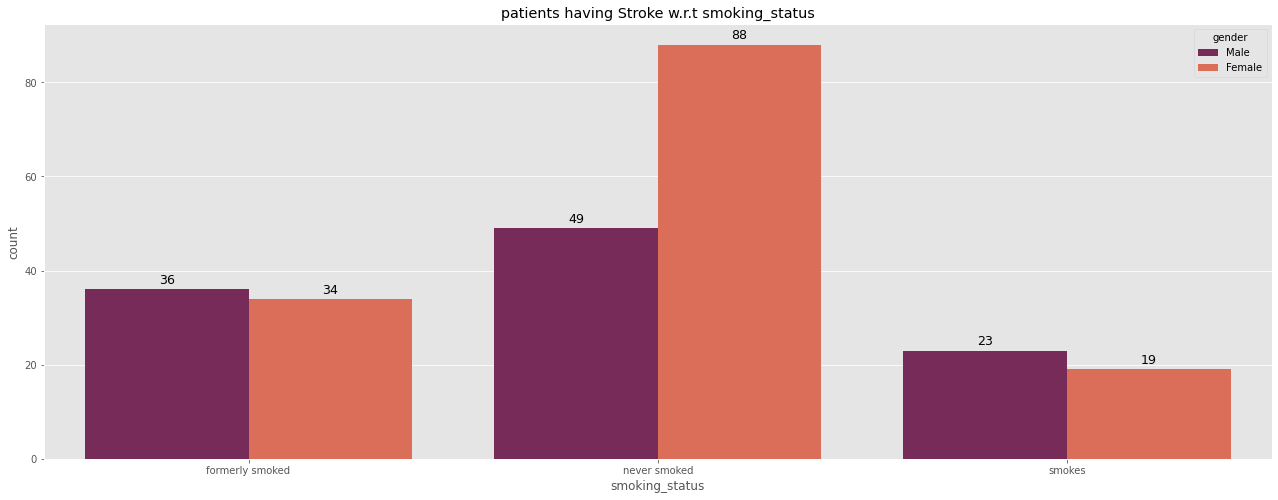

In [28]:
a = sns.countplot(x=stroke_1['smoking_status'], hue=stroke_1['gender'],palette='rocket')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.title("patients having Stroke w.r.t smoking_status")
plt.show()

# observation
Female who had never smoked are more likely to have stroke

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

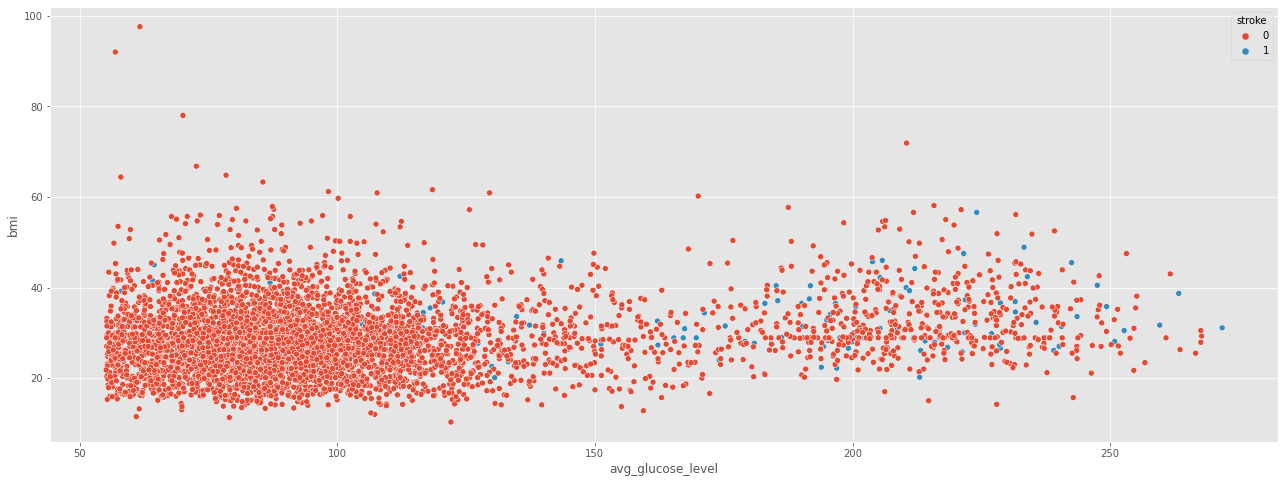

In [29]:
sns.scatterplot(x = data["avg_glucose_level"], y = data["bmi"],hue=data.stroke)

# observation
people having avg_glucose level more than 100 are more likely to have stroke

<AxesSubplot:xlabel='age', ylabel='bmi'>

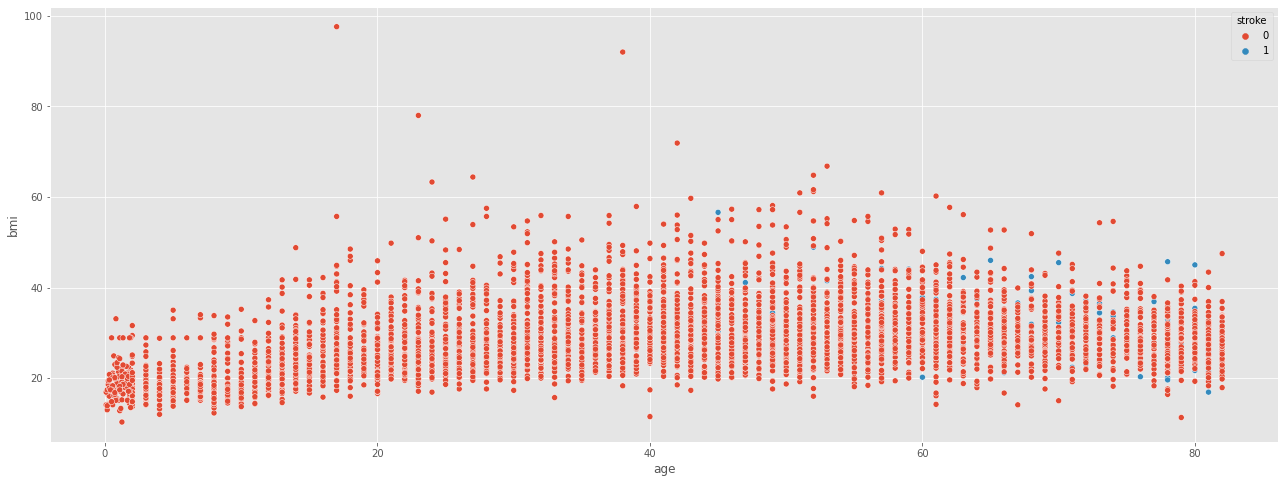

In [30]:
sns.scatterplot(x= data["age"], y = data["bmi"],hue=data.stroke)

# observation
people who have age above 40 year and bmi above 35 are more likely to have stroke, if age is above 60 the chances of having stroke even more

# outlier detection

In [1]:
#cheking the unique values in each categorical columns
#also checking for outliers in numerical columns
plt.figure(figsize = (15,25))
count = 1
for col in data:
    if(data[col].dtype == 'O'):
        print("Unique values in {} = {}".format(col,data[col].unique()))
    else:
        plt.subplot(5,2,count)
        plt.boxplot(data[col])
        plt.title(col)
        count +=1
        
plt.show()

NameError: name 'plt' is not defined

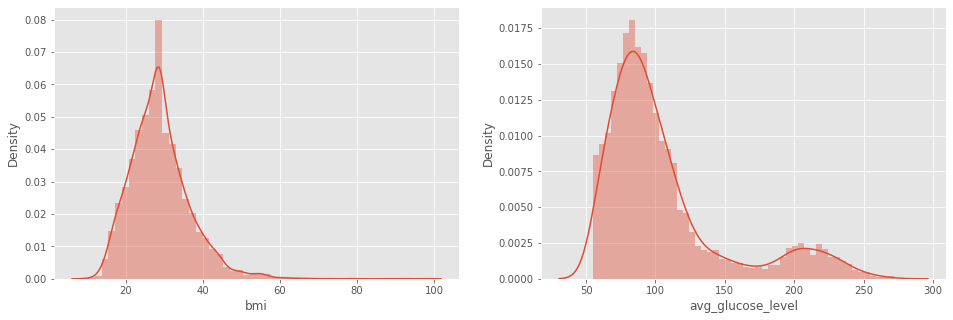

In [32]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['bmi'])

plt.subplot(1,2,2)
sns.distplot(data['avg_glucose_level'])

plt.show()

# Removing Outliers

In [33]:
print("Mean value of bmi",data['bmi'].mean())
print("Std value of bmi",data['bmi'].std())
print("Min value of bmi",data['bmi'].min())
print("Max value of bmi",data['bmi'].max())

Mean value of bmi 28.894507852666084
Std value of bmi 7.6982351236285345
Min value of bmi 10.3
Max value of bmi 97.6


In [34]:
print("Mean value of avg_glucose_level",data['avg_glucose_level'].mean())
print("Std value of avg_glucose_level",data['avg_glucose_level'].std())
print("Min value of avg_glucose_level",data['avg_glucose_level'].min())
print("Max value of avg_glucose_level",data['avg_glucose_level'].max())

Mean value of avg_glucose_level 106.14039929536098
Std value of avg_glucose_level 45.2850036657365
Min value of avg_glucose_level 55.12
Max value of avg_glucose_level 271.74


In [35]:
# Finding the boundary values
print("Highest allowed",data['bmi'].mean() + 3*data['bmi'].std())
print("Lowest allowed",data['bmi'].mean() - 3*data['bmi'].std())

Highest allowed 51.98921322355169
Lowest allowed 5.799802481780482


In [36]:
# Finding the boundary values
print("Highest allowed",data['avg_glucose_level'].mean() + 3*data['avg_glucose_level'].std())
print("Lowest allowed",data['avg_glucose_level'].mean() - 3*data['avg_glucose_level'].std())

Highest allowed 241.99541029257045
Lowest allowed -29.71461170184851


In [37]:
new_data = data[(data['bmi'] < 51.006) & (data['bmi'] > 6.636) &
                (data['avg_glucose_level'] < 241.99) & (data['avg_glucose_level'] > -29.70)]


In [38]:
new_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


<AxesSubplot:>

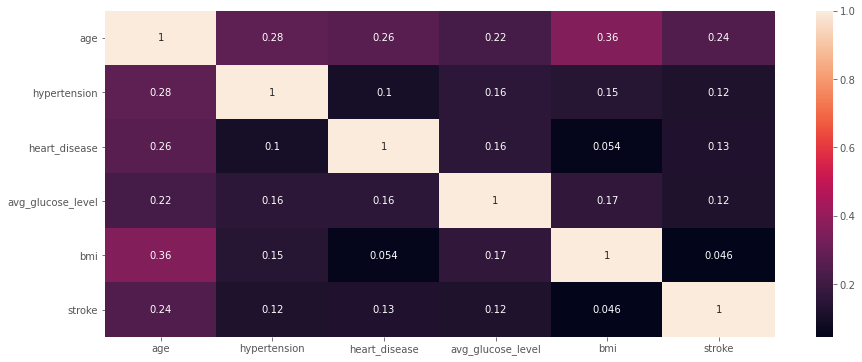

In [39]:
plt.figure(figsize = (15,6))
sns.heatmap(new_data.corr(), annot = True,fmt=".2g")

In [40]:
new_data.stroke.value_counts()

0    4757
1     239
Name: stroke, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [42]:
gender=enc.fit_transform(new_data['gender'])
smoking_status=enc.fit_transform(new_data['smoking_status'])
work_type=enc.fit_transform(new_data['work_type'])
Residence_type=enc.fit_transform(new_data['Residence_type'])
ever_married=enc.fit_transform(new_data['ever_married'])

In [43]:
new_data['work_type']=work_type
new_data['ever_married']=ever_married
new_data['Residence_type']=Residence_type
new_data['smoking_status']=smoking_status
new_data['gender']=gender


In [44]:
new_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,0,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,1,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,1,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,1,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,1,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,1,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,0,0


# Balancing Label column using SMOTE

In [45]:
X = new_data.loc[:, new_data.columns!='stroke']
y = new_data['stroke']

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
sm = SMOTE(random_state=2)

X_smote,y_smote=sm.fit_resample(X,y)

In [48]:
y_smote.value_counts()

0    4757
1    4757
Name: stroke, dtype: int64

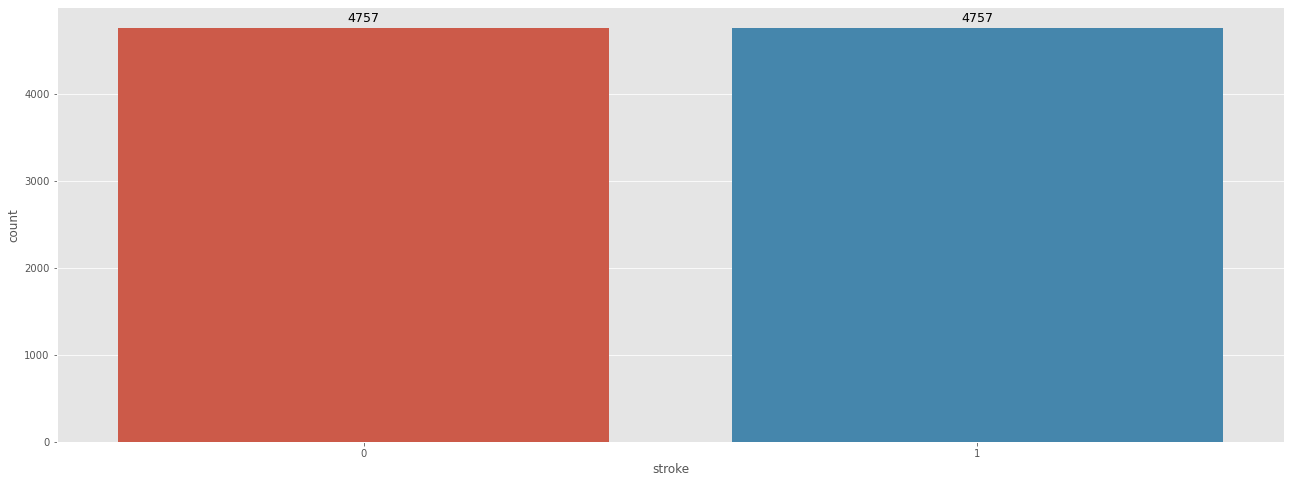

In [49]:
a = sns.countplot(y_smote)
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)

# Splitting the data for train and test

In [50]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size = 0.2,random_state = 0)

In [52]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3039,0,72.000000,0,0,1,3,1,65.120000,28.300000,1
7039,1,58.617123,0,0,0,0,1,214.896884,24.207225,1
8400,0,68.079503,0,0,0,0,1,82.156447,27.171553,1
3652,1,10.000000,0,0,0,4,0,117.030000,21.100000,1
6875,0,54.563995,0,0,0,2,1,70.618406,30.191984,1
...,...,...,...,...,...,...,...,...,...,...
7891,0,66.391746,0,0,1,2,0,206.956159,27.203897,1
9225,0,55.377760,0,0,0,2,1,69.750389,32.633280,1
4859,0,63.000000,0,0,1,2,1,57.060000,37.900000,1
3264,1,41.000000,0,0,0,2,1,70.550000,44.200000,1


In [53]:
y_train

3039    0
7039    1
8400    1
3652    0
6875    1
       ..
7891    1
9225    1
4859    0
3264    0
2732    0
Name: stroke, Length: 7611, dtype: int64

# Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [55]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# lets save the scaler object

In [56]:
import pickle
import os

In [58]:
scaler_path=os.path.join(r'G:\stroke','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [60]:
lr.fit(X_train_std,y_train)

LogisticRegression()

In [61]:
y_pred_lr=lr.predict(X_test_std)
y_pred_lr

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [62]:
#importing classification metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [63]:
ac_lr=accuracy_score(y_test,y_pred_lr)
ac_lr

0.8066211245401996

In [64]:
cf = confusion_matrix(y_test,y_pred_lr)
cf

array([[747, 209],
       [159, 788]], dtype=int64)

<AxesSubplot:>

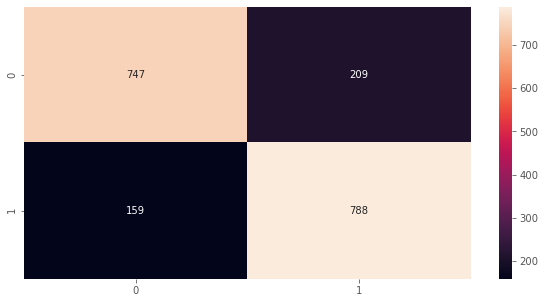

In [65]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,annot=True, fmt="d")

# Using Single Decision Tree

In [66]:

from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9027850761954809

# Hyperparameter tuning using RandomSearchCV

In [67]:
#hyperparameters values
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [3,4,5,6,7,8],
    'max_features':[4,5,6,7,8],
    'min_samples_leaf':np.arange(1,10)
}
obj = RandomizedSearchCV(model,param_distributions = params,cv = 10)

In [68]:
obj.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'max_features': [4, 5, 6, 7, 8],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [69]:
obj.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=7,
                       min_samples_leaf=4)

In [ ]:
obj.best_params_

# Model Building using hyperparameters

In [70]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

In [71]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=7,
                       min_samples_leaf=4, min_samples_split=7, random_state=0)

In [72]:
y_pred = model.predict(X_test)

In [73]:
acc = accuracy_score(y_test,y_pred)
acc

0.8344718864950079

In [74]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[737, 219],
       [ 96, 851]], dtype=int64)

<AxesSubplot:>

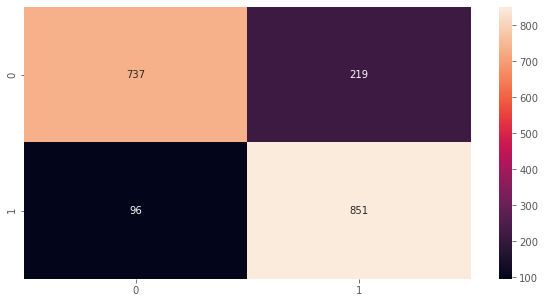

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,annot=True, fmt="d")

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [78]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [79]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.9390436153441933

In [80]:
cf = confusion_matrix(y_test, rf_clf.predict(X_test))
cf

array([[878,  78],
       [ 38, 909]], dtype=int64)

<AxesSubplot:>

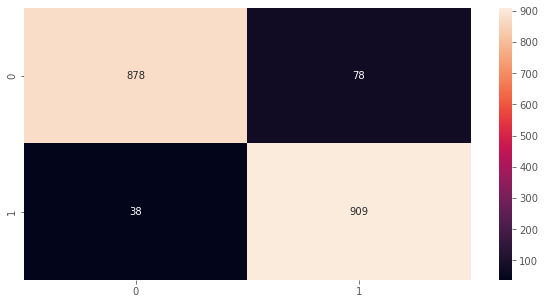

In [81]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,annot=True, fmt="d")

# Random Forest With Hyperparameter tuning

In [82]:
param_distributions = {
    'n_estimators':np.arange(50,251,50),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(1,10),
    'max_features':np.arange(1,4),
    'min_samples_leaf':np.arange(1,11)
}

In [83]:
estimator = RandomForestClassifier(random_state=0)

In [84]:
rscv = RandomizedSearchCV(estimator,param_distributions,cv=10)

In [85]:
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': array([1, 2, 3]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250])})

In [86]:
rscv.best_params_

{'n_estimators': 150,
 'min_samples_leaf': 5,
 'max_features': 3,
 'max_depth': 7,
 'criterion': 'entropy'}

In [87]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=3,
                       min_samples_leaf=5, n_estimators=150, random_state=0)

In [89]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=3,
                       min_samples_leaf=5, n_estimators=150)

In [91]:
y_pred = model.predict(X_test)

In [92]:
acc = accuracy_score(y_test, y_pred)
acc

0.8528638991066737

In [93]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[740, 216],
       [ 64, 883]], dtype=int64)

<AxesSubplot:>

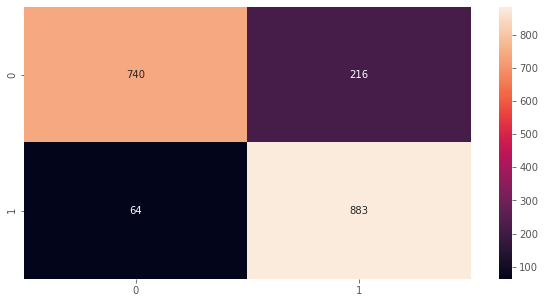

In [94]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,annot=True, fmt="d")

# Gradient Boosting

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [97]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.8770362585391487

In [98]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [99]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.8271150814503415

In [100]:
cf = confusion_matrix(y_test, gbc_clf2.predict(X_test))
cf

array([[728, 228],
       [101, 846]], dtype=int64)

<AxesSubplot:>

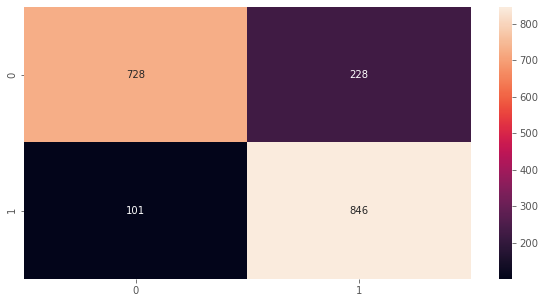

In [101]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,annot=True, fmt="d")

# AdaBoost

In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [112]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [113]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.8434051497635313

In [114]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate =0.05, n_estimators =500)

In [115]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                         n_jobs=-1,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [116]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.9364161849710982

In [117]:
cf = confusion_matrix(y_test, ada_clf2.predict(X_test))
cf

array([[874,  82],
       [ 39, 908]], dtype=int64)

<AxesSubplot:>

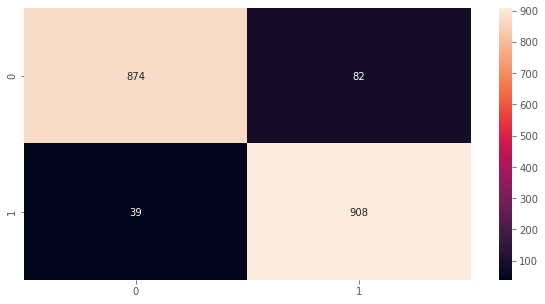

In [118]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,annot=True, fmt="d")

# XGBoost

In [119]:
import xgboost as xgb

In [120]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [121]:
xgb_clf.fit(X_train, y_train)

[14:03:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [122]:
y_pred = xgb_clf.predict(X_test)

In [123]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.954282711508145

In [124]:
cf = confusion_matrix(y_test, xgb_clf.predict(X_test))
cf

array([[911,  45],
       [ 42, 905]], dtype=int64)

<AxesSubplot:>

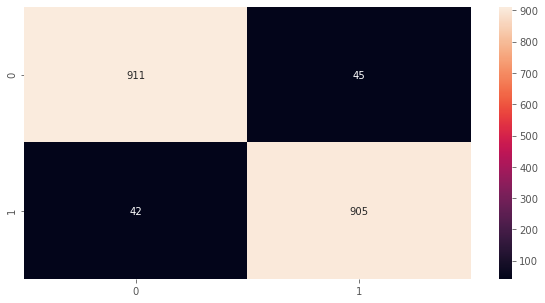

In [125]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,annot=True, fmt="d")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

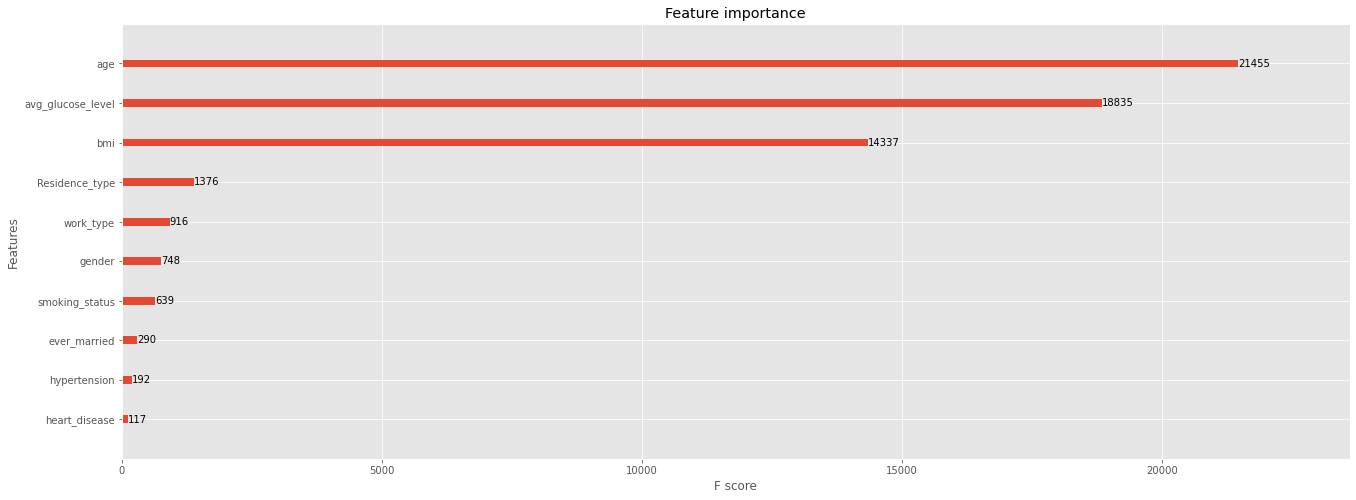

In [126]:
xgb.plot_importance(xgb_clf)

# Conclusion
XG Boost classifier gave an accuracy of 95.42%,

# Save your model

In [127]:
import joblib


In [128]:
joblib.dump(xgb_clf, r'G:\stroke\models\xgb_clf.sav')

['G:\\stroke\\models\\xgb_clf.sav']

In [129]:
model = joblib.load(r'G:\stroke\models\xgb_clf.sav')